In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2
import math
# 1.1
rng = np.random.default_rng()
def bern_distr(p, n):
    # Распр. бернули
    return list(map(int, rng.random(n) < p))

In [26]:
# 1.2
p = 0.4
n = 10000
sample = bern_distr(p, n)
K = range(100, n + 100, 100)
nu = [sum(sample[:k])/k for k in K]

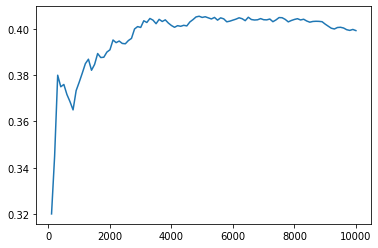

In [27]:
plt.plot(K, nu)

Выборочное среднее сходится по вероятности к теоретическому мат. ожиданию в 0.4

https://stackoverflow.com/questions/20626994/how-to-calculate-the-inverse-of-the-normal-cumulative-distribution-function-in-p
https://stats.stackexchange.com/questions/265925/what-is-inverse-cdf-normal-distribution-formula
https://100task.ru/sample/119.aspx
http://info.levandovskiy.info/wp-content/uploads/2017/12/kriterii_kvantili.pdf
https://ru.stackoverflow.com/questions/542603/%D0%9A%D0%B0%D0%BA-%D0%BF%D0%BE%D0%BB%D1%83%D1%87%D0%B8%D1%82%D1%8C-%D0%B7%D0%BD%D0%B0%D1%87%D0%B5%D0%BD%D0%B8%D0%B5-%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8-%D0%BB%D0%B0%D0%BF%D0%BB%D0%B0%D1%81%D0%B0-python
https://www.berdov.com/works/teorver/integralnaya-teorema-muavra-laplasa/

In [38]:
# 1.12
def Bi_kp(k, p):
    # Биномаинальное распределение
    return sum(bern_distr(k, p))
# 1.15
n = 1000
p = 3./5.
sample = bern_distr(p, n)
one_count = sum(sample) # число успехов
gamma = 0.98
t = norm.ppf( (gamma + 1.) / 2.)
delta = t * math.sqrt(p*(1.-p)/n)
print(one_count / n - p, delta)

0.018000000000000016 0.03603962629458082


То есть резульатты подбрасывания 1000 монеток, у каждой из который вероятность решки 0.6, укладываеются в границу |v_n/n - p| < delta_gamma, при gamma = 0.98

In [34]:
from scipy.stats import norm
norm.cdf(np.linspace(0,1,101)) - 0.5

array([0.        , 0.00398936, 0.00797831, 0.01196647, 0.01595344,
       0.01993881, 0.02392218, 0.02790317, 0.03188137, 0.03585639,
       0.03982784, 0.04379531, 0.04775843, 0.05171679, 0.05567   ,
       0.05961769, 0.06355946, 0.06749493, 0.07142372, 0.07534543,
       0.07925971, 0.08316616, 0.08706442, 0.09095412, 0.09483487,
       0.09870633, 0.10256811, 0.10641987, 0.11026125, 0.11409188,
       0.11791142, 0.12171952, 0.12551583, 0.12930002, 0.13307174,
       0.13683065, 0.14057643, 0.14430875, 0.14802729, 0.15173173,
       0.15542174, 0.15909703, 0.16275727, 0.16640218, 0.17003145,
       0.17364478, 0.17724189, 0.18082249, 0.1843863 , 0.18793305,
       0.19146246, 0.19497427, 0.19846821, 0.20194403, 0.20540148,
       0.20884031, 0.21226028, 0.21566115, 0.21904269, 0.22240468,
       0.22574688, 0.2290691 , 0.23237111, 0.23565271, 0.2389137 ,
       0.24215389, 0.24537309, 0.2485711 , 0.25174777, 0.25490291,
       0.25803635, 0.26114793, 0.2642375 , 0.26730491, 0.27035

In [36]:
norm.ppf(0.99)

2.3263478740408408

In [35]:
norm.cdf(0.5) - 0.5

0.19146246127401312

In [21]:
# 1.16
import numpy as np
# подкинуть игральную костью 12 раз
rng = np.random.default_rng()
sample = rng.multinomial(12, [1/6.]*6)
rv = sum(sample[3:])
rv, sample


(7, array([2, 3, 0, 0, 3, 4]))

In [58]:
d = {}
n = 4096
d['i'] = list(range(0, 13))
d['h_i'] = [0, 7, 60, 198, 430, 731, 948, 847, 536, 257, 71, 11, 0]

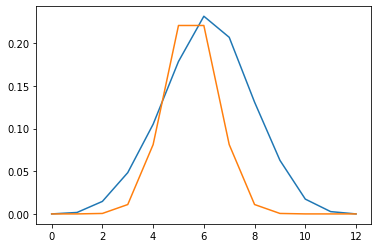

In [59]:
plt.plot(range(0,13), np.asarray(d['h_i']) / n)
def func(x, c):
    return c*np.exp(-x**2/2.)
plt.plot(range(0, 13), [func(x-5.5, c=0.25) for x in range(0, 13)])

In [62]:
sample = np.asarray(d['h_i'])
# mean = sample.mean()
# var = sample.var(ddof=1)
# print(mean, var)
mean = sum(sample * np.asarray(range(0, 13))) / n
mean

6.138916015625

In [65]:
gamma = 0.998
n = 4096
t = norm.ppf( (gamma + 1.) / 2.)
delta = t * math.sqrt(3/n)
print(delta)
print(f"Наблюдаемое значение |mean - 6| = {mean-6} > {delta} => мы наблюдаем маловероятное событие")

0.08363186502302179
Наблюдаемое значение |mean - 6| = 0.138916015625 > 0.08363186502302179 => мы наблюдаем маловероятное событие


In [69]:
# 3.1
df = 1
print("0.95 и 0.9 квантили распр. Хи квадрат:", chi2.ppf(0.95, df), chi2.ppf(0.9, df))
print("Эти знаяения больше, чем статистика Хи квадрат =", 0.776, "поэтому по данным нельзя отвергнуть нулевую гипотезу о распрпеделении данных по биноминальному закону с уровнем значимости 0.95")

0.95 и 0.9 квантили распр. Хи квадрат: 3.841458820694124 2.705543454095404
Эти знаяения больше, чем статистика Хи квадрат = 0.776 поэтому по данным нельзя отвергнуть нулевую гипотезу о распрпеделении данных по биноминальному закону с уровнем значимости 0.95
